# Train Data

In [248]:
import datetime as dt
import yfinance as yf
import pandas as pd
from ta.volatility import BollingerBands

In [249]:
btc = yf.Ticker("BTC-USD")

startDate = dt.datetime(2016,1,1)
endDate = dt.datetime(2021,1,1)

btcTrain = btc.history(start=startDate, end=endDate)[["Open", "Close"]]

bollinger = BollingerBands(close=btcTrain["Close"], window=20, window_dev=2)
btcTrain['Bollinger'] = bollinger.bollinger_hband()

startDate = dt.datetime(2016,1,1)
endDate = dt.datetime(2021,1,1)

btcTrain["Next Day"] = btc.history(start=startDate, end=endDate)["Close"]

# Index Esitleme
startDate = dt.datetime(2016,1,2)
endDate = dt.datetime(2021,1,2)
NextDay = btc.history(start=startDate, end=endDate)[["Close"]]
NextDay.set_index(btcTrain.index, inplace=True)
btcTrain["Next Day"] = NextDay["Close"]

btcTrain=btcTrain[19:]
btcTrain.head()

,Bollinger,Next Day
Date,,
2016-01-19,477.446889,420.230011
2016-01-20,476.861536,410.261993
2016-01-21,475.699907,382.492004
2016-01-22,475.558275,387.490997
2016-01-23,474.902889,402.971008


# Test Data

In [250]:
btc = yf.Ticker("BTC-USD")

startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)

btcTest = btc.history(start=startDate, end=endDate)[["Open", "Close"]]

bollinger = BollingerBands(close=btcTest["Close"], window=20, window_dev=2)
btcTest["Bollinger"] = pd.DataFrame(bollinger.bollinger_hband()).set_index(btcTest.index)

startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)

btcTest["Next Day"] = btc.history(start=startDate, end=endDate)["Close"]

# Index Esitleme
startDate = dt.datetime(2021,1,2)
endDate = dt.datetime(2022,1,2)
NextDay = btc.history(start=startDate, end=endDate)[["Close"]]
NextDay.set_index(btcTest.index, inplace=True)
btcTest["Next Day"] = NextDay["Close"]

btcTest=btcTest[19:]
btcTest.head()

,Bollinger,Next Day
Date,,
2021-01-19,42125.853513,35547.750000
2021-01-20,41704.938542,30825.699219
2021-01-21,41473.107131,33005.761719
2021-01-22,41404.043859,32067.642578
2021-01-23,41464.214588,32289.378906


___

In [251]:
y_train, X_train = btcTrain["Next Day"], btcTrain.drop("Next Day", axis=1)

# Statsmodels

In [252]:
import statsmodels.api as sm

In [253]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Next Day   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.057e+05
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        22:30:11   Log-Likelihood:                         -15086.
No. Observations:                1809   AIC:                                  3.017e+04
Df Residuals:                    1808   BIC:                                  3.018e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bollinger      0.8952      0.003    325.191      0.000       0.890       0.901
==============================================================================
Omnibus:                      593.302   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3898.396
Skew:                          -1.375   Prob(JB):                         0.00
Kurtosis:                       9.645   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Sklearn

In [254]:
from sklearn.linear_model import LinearRegression

In [255]:
skitLm = LinearRegression()
modelSkiLm = skitLm.fit(X_train, y_train)

## Visualitizion

In [256]:
import seaborn as sns

In [257]:
prediction = []
for i in range(btcTest.shape[0]):
    data = []
    for j in range(1):
        data.append([btcTest.iloc[i][j]])
    data = pd.DataFrame(data).T
    prediction.append(modelSkiLm.predict(data)[0])

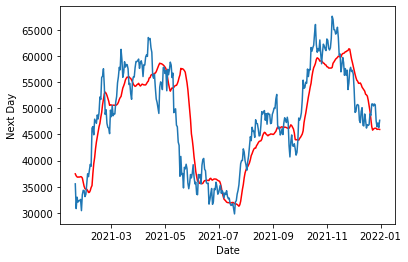

In [258]:
sns.lineplot(y=prediction, x=btcTest.index,color="red")
sns.lineplot(y=btcTest["Next Day"], x=btcTest.index);